In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('default')

df = pd.read_csv("/datc/opschaler/combined_gas_smart_weather_dfs/processed/P01S01W8655_10s.csv",header=0,delimiter="\t",parse_dates = ['datetime'])
df = df.set_index(['datetime'])

# df1h =  df.resample('H').mean()
# df3h = df.resample('3H').mean()
# df6h = df.resample('6H').mean()
# df12h = df.resample('12H').mean()
# df1d = df.resample('1D').mean()
# df1w = df.resample('1W').mean()
# df1m = df.resample('1M').mean()

# rdf1h = df1h[df1h['T'] < 16]
# rdf3h = df3h[df3h['T'] < 16]
# rdf6h= df6h[df6h['T'] < 16]
# rdf12h = df12h[df12h['T'] < 16]
# rdf1d= df1d[df1d['T'] < 16]
# rdf1w = df1w[df1w['T'] < 16]
# rdf1m = df1m[df1m['T'] < 16]


In [108]:
def resample_df(df, sample_rate):

    df = df.drop(['gasPower'], axis=1) # Drop gasPower, calculate it again later
    
    to_sum = ['eMeterReturn', 'eMeterLow', 'eMeterLowReturn', 'ePower', 'ePowerReturn'] # resampler.sum() these columns
    to_last = ['gasMeter', 'eMeter'] # resample.last(), take last known value from the columns
    
    df[to_sum] = df[to_sum].resample(sample_rate).sum() # sum values
    df[to_last] = df[to_last].resample(sample_rate).last() # take last value moest nearby the sample_rate
    df = df.resample(sample_rate).mean() # resample to 1H by mean (this wont change the values calculated by .sum() and .last())
    
    # Calculate gasPower
    df['gasPower'] = df['gasMeter'].diff()
    df['gasPower'][0] = df['gasPower'][1] # Replace 1st entry (NaN) with 2nd entry
    
    return df

df = df.dropna()

df1h =  resample_df(df, 'H')
df3h = resample_df(df, '3H')
df6h = resample_df(df, '6H')
df12h = resample_df(df, '12H')
df1d = resample_df(df, 'D')
df1w = resample_df(df, '7D')
df1m = resample_df(df, '1M')


# rdf1h = df1h[df1h['T'] < 16]
# rdf3h = df3h[df3h['T'] < 16]
# rdf6h= df6h[df6h['T'] < 16]
# rdf12h = df12h[df12h['T'] < 16]
# rdf1d= df1d[df1d['T'] < 16]
# rdf1w = df1w[df1w['T'] < 16]
# rdf1m = df1m[df1m['T'] < 16]

In [109]:
df1m.head()

eMeter  eMeterReturn     eMeterLow  eMeterLowReturn  \
datetime                                                               
2017-04-30   807.578003           0.0  4.109999e+07              0.0   
2017-05-31   919.075012           0.0  2.210255e+08              0.0   
2017-06-30  1013.317993           0.0  2.424718e+08              0.0   
2017-07-31  1124.718018           0.0  2.416395e+08              0.0   
2017-08-31  1242.562988           0.0  3.007362e+08              0.0   

                ePower  ePowerReturn     gasMeter          DD         DR  \
datetime                                                                   
2017-04-30  21635555.5           0.0  1627.214966  221.910693  36.681386   
2017-05-31  85631981.0           0.0  1660.645996  171.910961  24.435120   
2017-06-30  65140604.5           0.0  1667.894043  196.592678  22.721860   
2017-07-31  69008736.5           0.0  1676.046021  213.215512  56.220386   
2017-08-31  75088442.5           0.0  1684.859985  197.643473  42.836437   

                  FF    ...               Q        RG        SQ          T  \
datetime                ...                                                  
2017-04-30  3.898377    ...      210.230341  0.082154  3.223538   8.106320   
2017-05-31  3.742718    ...      223.154012  0.044129  3.178747  14.910198   
2017-06-30  4.454288    ...      241.898532  0.058847  3.348595  18.268001   
2017-07-31  3.848086    ...      213.552411  0.216265  2.768327  18.166151   
2017-08-31  3.256244    ...      177.196597  0.115442  2.652458  17.566361   

                  T10         TD          U            VV         WW  \
datetime                                                               
2017-04-30   7.675041   2.996942  71.833394  35113.005934  12.852807   
2017-05-31  14.689131   9.881307  73.594063  28772.905320   7.957839   
2017-06-30  18.094783  12.736006  71.467061  29119.871852   7.974408   
2017-07-31  17.858624  13.957637  77.550043  27035.021909  14.027724   
2017-08-31  16.912315  13.773095  79.459788  26303.060927  10.845676   

             gasPower  
datetime               
2017-04-30  33.431030  
2017-05-31  33.431030  
2017-06-30   7.248047  
2017-07-31   8.151978  
2017-08-31   8.813965  

[5 rows x 23 columns]

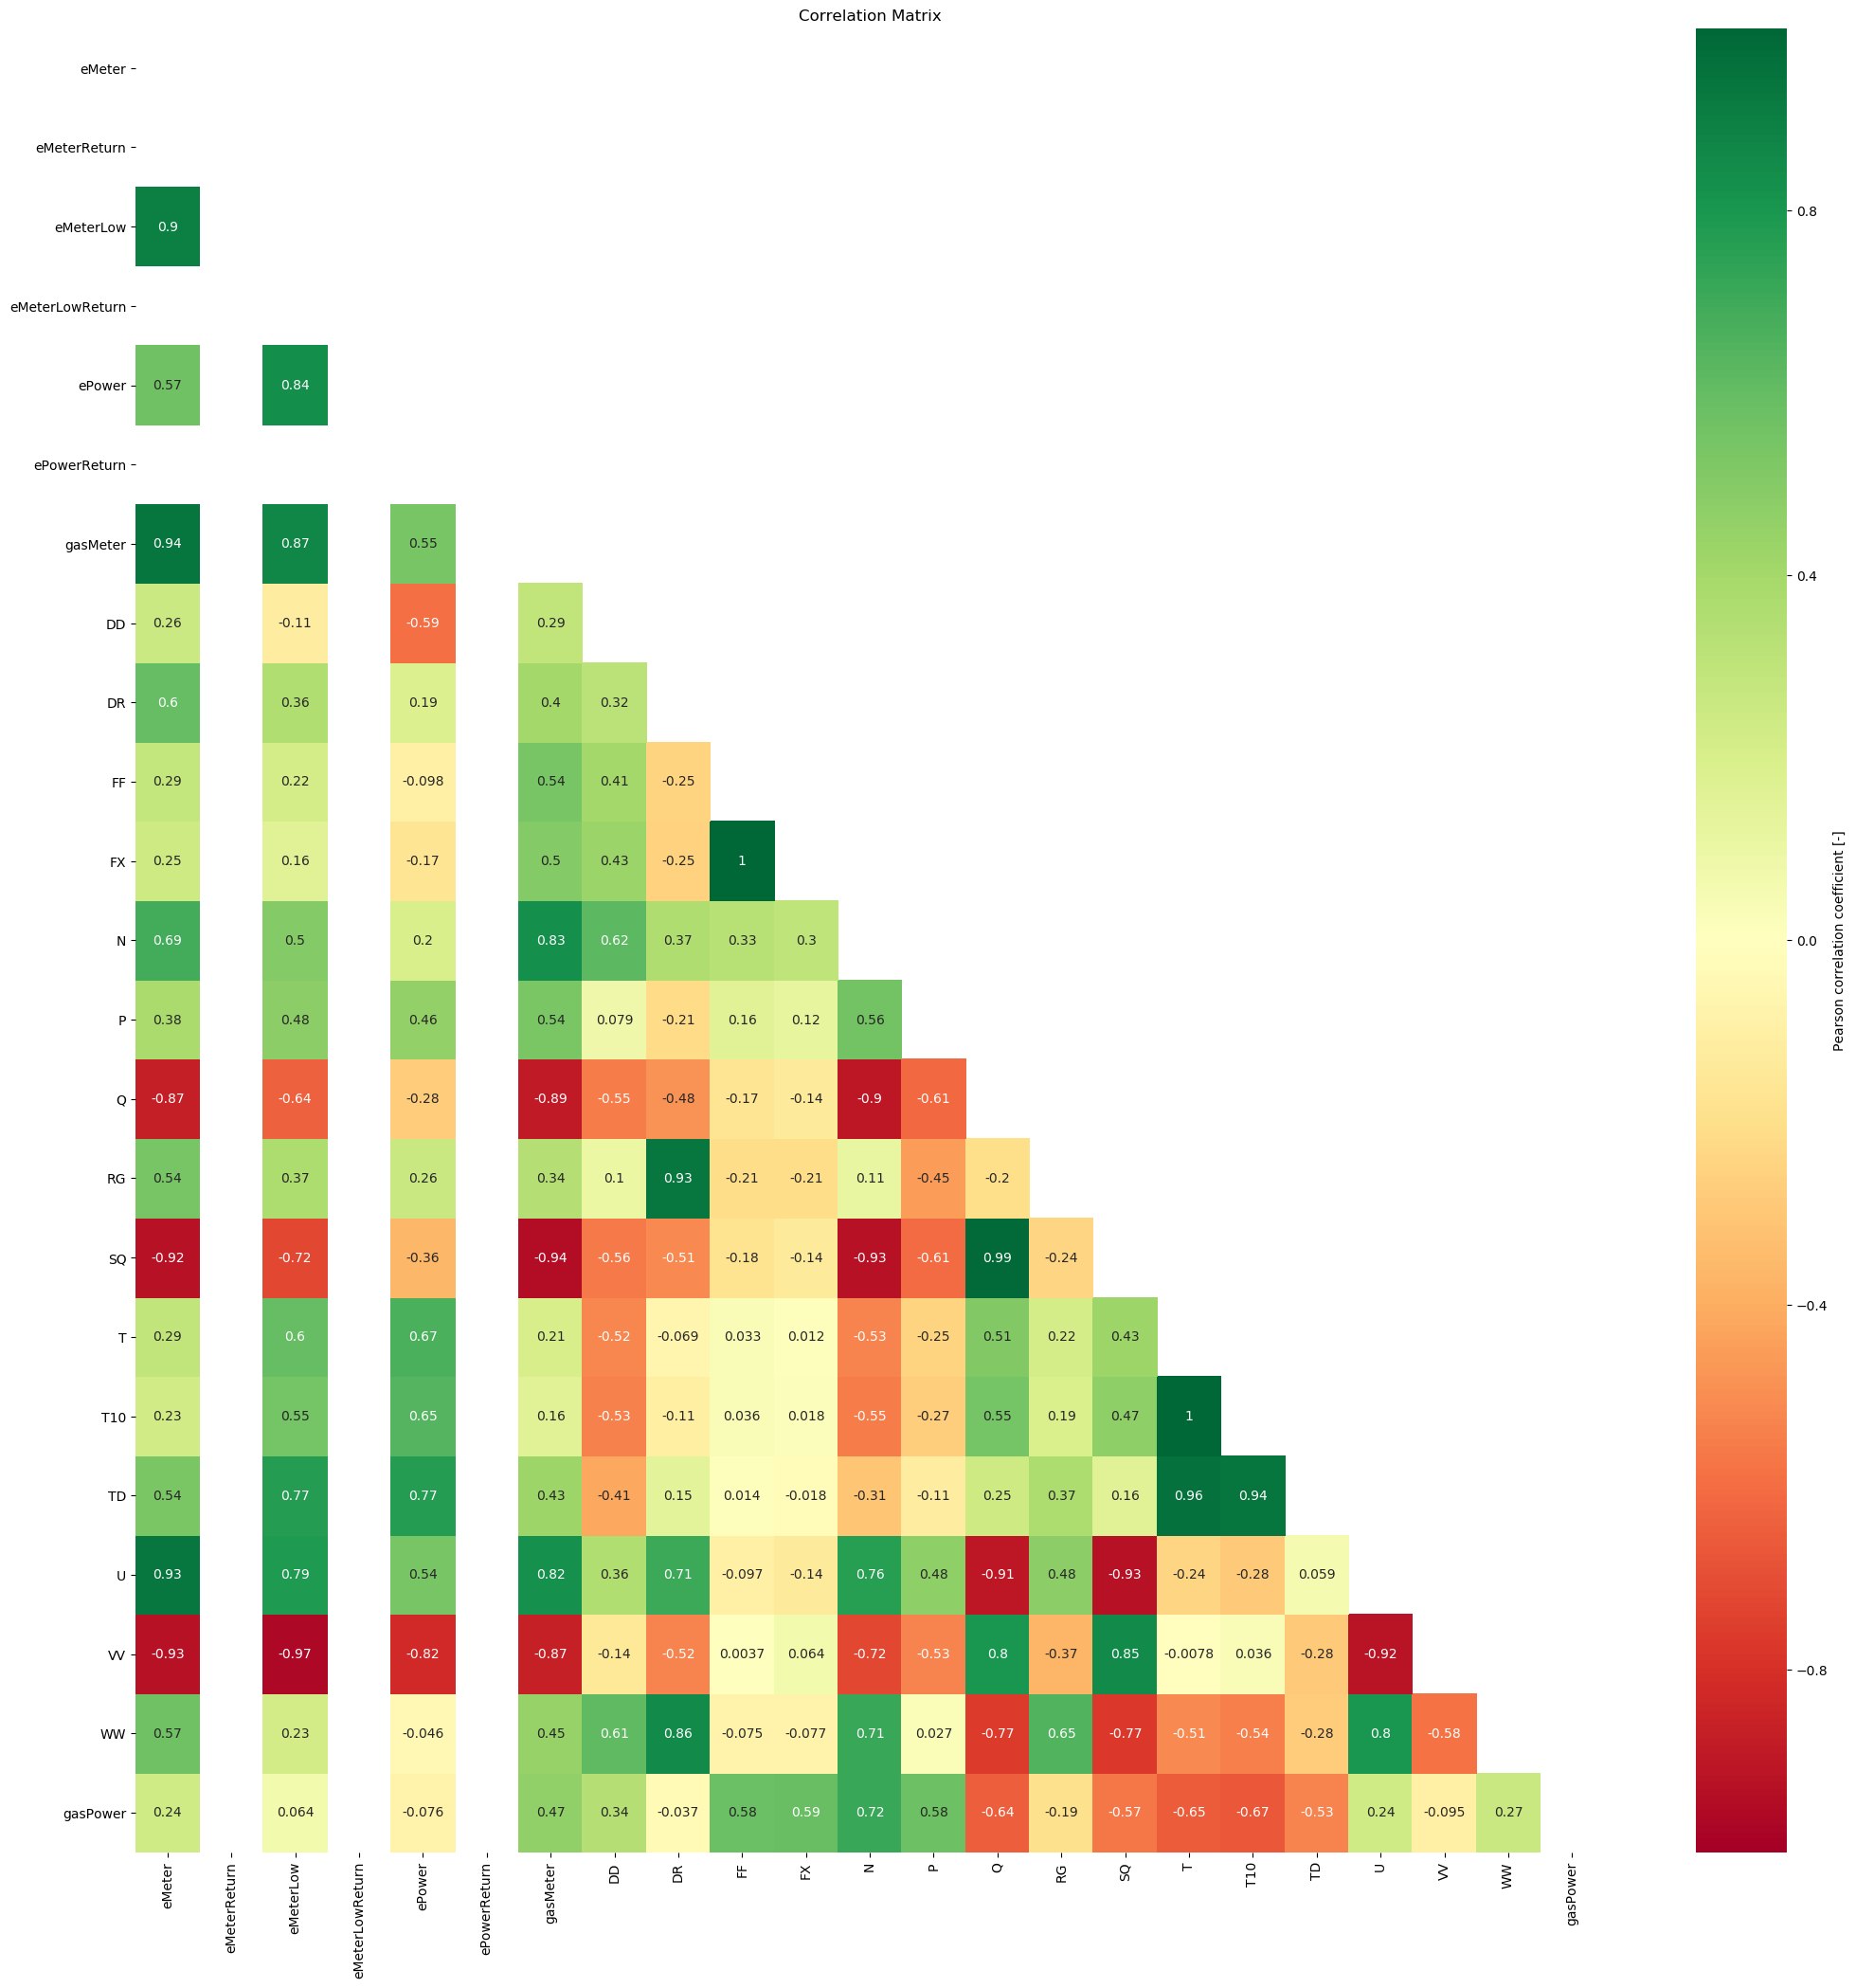

In [88]:
corr = df1m.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(25,25))

sns.heatmap(corr, mask=mask, square=False, cmap='RdYlGn', annot=True, ax=ax,
            cbar_kws={'label':'Pearson correlation coefficient [-]'})

plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
#plt.savefig('sample.png', dpi=500)
plt.show()


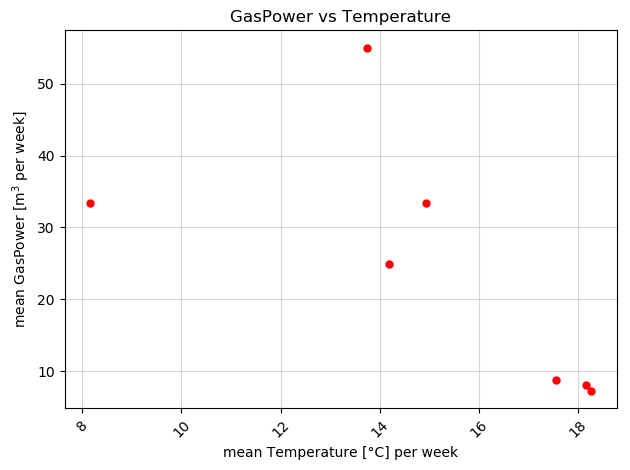

In [97]:
plt.title('GasPower vs Temperature')

plt.plot(df1m['T'][:],df1m['gasPower'][:], '.', color='r', ms=10)
plt.ylabel('mean GasPower [m$^3$ per week]')
plt.xlabel('mean Temperature [°C] per week')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig('sample2.png', dpi=1000)

# # linear regressions
# params = np.polyfit(rdf1m['T'],rdf1m['gasPower'], 1)
# def model(x, a, b):
#     return a * x + b

# # Extrapolations
# x = np.array([0,20])
# plt.plot(x, model(x, *params), 'k--', alpha=0.5, linewidth=0.5)

# #Fit
# x = np.array([min(rdf1m['T']), max(rdf1m['T'])])
# plt.plot(x, model(x, *params), 'k-')

# plt.xlim(0,20)
# plt.ylim(0, 60)

plt.show()